### Example Neural network vs ML Models Noisy Data
<br>Carlos Estevez
<br>carlos@estevez.do
<br>https://github.com/carlosAtestevez

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import copy
from sklearn.datasets import make_circles,make_moons


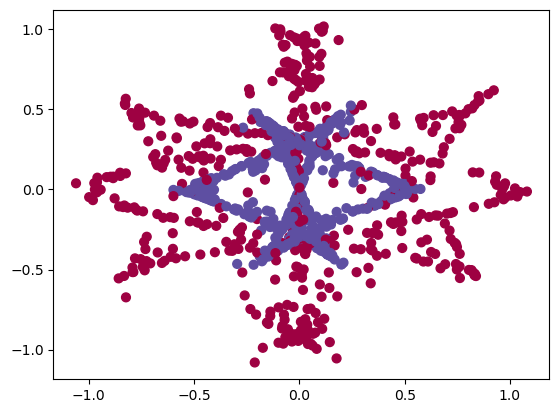

In [2]:
def plot_decision_boundary(clf, X, y,resolution=0.01, title='Decision Boundary'):
    # Create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))

    # Predict the class using the classifier
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.show()

def plot_decision_boundary_nn(X, y,resolution=0.01, title='Decision Boundary'):
    # Create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))

    # Predict the class using the classifier
    Z = predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.show()

def plot_decision_boundary_v2(clf, X, y, resolution=0.01, title='Decision Boundary'):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))

    # Predict the class using the classifier
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)

    # Plot the original data points with true class labels
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.coolwarm, label='True Labels')

    # Plot the predicted class labels (to see differences)
    y_pred = clf.predict(X)
    plt.scatter(X[:, 0], X[:, 1], c=y_pred, marker='x', cmap=plt.cm.RdYlBu, alpha=0.5, label='Predicted Labels')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.legend(*scatter.legend_elements(), title="Classes")
    plt.show()


def generate_data_circles(noise=0.1):
    # Generate a dataset
    X, y = make_circles(n_samples=1000, factor=0.1, noise=noise)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
    plt.show()
    return X,y

def generate_data_moon(noise=0.25):
    X,y = make_moons(n_samples=1000,noise=noise)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
    #plt.show()
    return X,y

def generate_transformed_circles(noise=0.05):
    X, y = make_circles(n_samples=1000, factor=0.5, noise=noise)

    # Transform the dataset to achieve the desired pattern
    def transform(X):
        X_transformed = np.copy(X)
        X_transformed[:, 0] = X[:, 0] * np.cos(X[:, 1] * 5)
        X_transformed[:, 1] = X[:, 1] * np.sin(X[:, 0] * 5)
        return X_transformed

    X_transformed = transform(X)
    plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
    return X_transformed, y

#X,y = generate_data_circles(0.3)
#X,y = generate_data_moon(0.3)
X, y = generate_transformed_circles(0.05)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

<a name='4'></a>
## 4 - Neural Network model

Logistic regression didn't work well on the flower dataset. Next, you're going to train a Neural Network with a single hidden layer and see how that handles the same problem.

**The model**:

**Mathematically**:

For one example $x^{(i)}$:
$$z^{[1] (i)} =  W^{[1]} x^{(i)} + b^{[1]}\tag{1}$$ 
$$a^{[1] (i)} = \tanh(z^{[1] (i)})\tag{2}$$
$$z^{[2] (i)} = W^{[2]} a^{[1] (i)} + b^{[2]}\tag{3}$$
$$\hat{y}^{(i)} = a^{[2] (i)} = \sigma(z^{ [2] (i)})\tag{4}$$
$$y^{(i)}_{prediction} = \begin{cases} 1 & \mbox{if } a^{[2](i)} > 0.5 \\ 0 & \mbox{otherwise } \end{cases}\tag{5}$$

Given the predictions on all the examples, you can also compute the cost $J$ as follows: 
$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large\left(\small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right)  \large  \right) \small \tag{6}$$

**Reminder**: The general methodology to build a Neural Network is to:
    1. Define the neural network structure ( # of input units,  # of hidden units, etc). 
    2. Initialize the model's parameters
    3. Loop:
        - Implement forward propagation
        - Compute loss
        - Implement backward propagation to get the gradients
        - Update parameters (gradient descent)

In practice, you'll often build helper functions to compute steps 1-3, then merge them into one function called `nn_model()`. Once you've built `nn_model()` and learned the right parameters, you can make predictions on new data.

In [3]:
def layer_sizes(X, Y):
    n_x = X.shape[0]
    n_h = 4
    n_y = Y.shape[0]
    return (n_x, n_h, n_y)

def initialize_parameters(n_x, n_y, n_h):
    W1 = np.random.randn(n_h, n_x) * 0.01  # Scaling initialization
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01  # Scaling initialization
    b2 = np.zeros((n_y, 1))
    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    return parameters

def tangent_act_function(input):
    return np.tanh(input)

def sigmoid_act_function(Input):
    return 1 / (1 + np.exp(-1 * Input))

def forward_propagation(X, parameters):
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    b1 = parameters["b1"]
    b2 = parameters["b2"]

    Z1 = np.dot(W1, X) + b1
    A1 = tangent_act_function(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid_act_function(Z2)

    cache = {"Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2}
    return A2, cache

def calculate_cost(A2, Y):
    m = Y.shape[1]
    logprobs = -1 * (np.multiply(Y, np.log(A2)) + np.multiply((1 - Y), np.log(1 - A2)))
    cost = np.sum(logprobs) / m
    cost = float(np.squeeze(cost))
    return cost

def backward_propagation(X, Y, parameters, cache):
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    b1 = parameters["b1"]
    b2 = parameters["b2"]
    A1 = cache["A1"]
    A2 = cache["A2"]

    m = X.shape[1]

    dZ2 = A2 - Y
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2))
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)

    grads = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}
    return grads

def update_parameters(parameters, grads, learning_rate=1.2):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]

    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    return parameters

def nn_model(X, Y, n_h, num_iterations=10000, print_cost=False):
    np.random.seed(3)
    n_x, _, n_y = layer_sizes(X, Y)
    parameters = initialize_parameters(n_x, n_y, n_h)
    costs = []

    for i in range(0, num_iterations):
        A2, cache = forward_propagation(X, parameters)
        cost = calculate_cost(A2, Y)
        grads = backward_propagation(X, Y, parameters, cache)
        parameters = update_parameters(parameters, grads)

        if print_cost and i % 1000 == 0:
            print(f"Cost after iteration {i}: {cost}")
            costs.append(cost)
    
    return parameters, costs


def plot_decision_boundary_nn(model, X, y):
    # Set min and max values and give some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Forward propagate the model on the grid of points
    grid_points = np.c_[xx.ravel(), yy.ravel()].T
    Z = model(grid_points)
    Z = Z.reshape(xx.shape)
    
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[0, :], X[1, :], c=y[0, :], s=40, edgecolor='k', cmap=plt.cm.Spectral)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("Decision Boundary")
    plt.show()

def predict(parameters, X):
    A2, _ = forward_propagation(X, parameters)
    predictions = (A2 > 0.5).astype(int)
    return predictions

In [4]:
#Training the Network
y = y_train.reshape(-1,1)
YT = y.T
XT = X_train.T
parameters, costs = nn_model(XT, YT, n_h=30, num_iterations=10000, print_cost=True)

Cost after iteration 0: 0.6931468861344348
Cost after iteration 1000: 0.6929579440387229
Cost after iteration 2000: 0.6926948225406931
Cost after iteration 3000: 0.3964558452269033
Cost after iteration 4000: 0.36567762243754715
Cost after iteration 5000: 0.33430118521892593
Cost after iteration 6000: 0.33018246443663846
Cost after iteration 7000: 0.3285320069414116
Cost after iteration 8000: 0.3276366102145261
Cost after iteration 9000: 0.3271242133441111


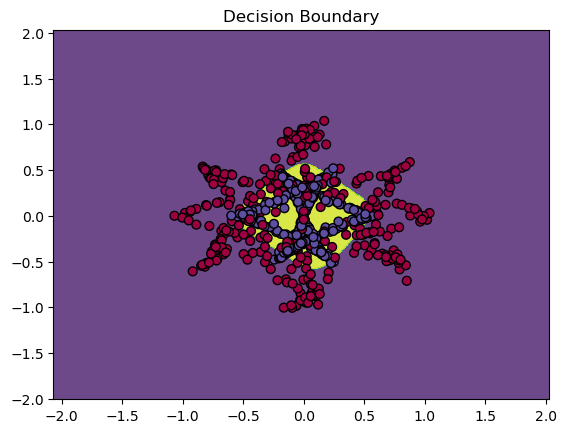

Forecast accuracy:0.836


In [20]:
# Plot the decision boundary
yt = y_test.reshape(-1,1)
YTT = yt.T
XTT = X_test.T
y_predictions = predict(parameters,XTT)
y_predictions
plot_decision_boundary_nn(lambda x: predict(parameters, x), XT, YT)


score = accuracy_score(YTT,y_predictions)
score = (np.sum(y_predictions==YTT)/330)
print(f"Forecast accuracy:{score:.3f}")

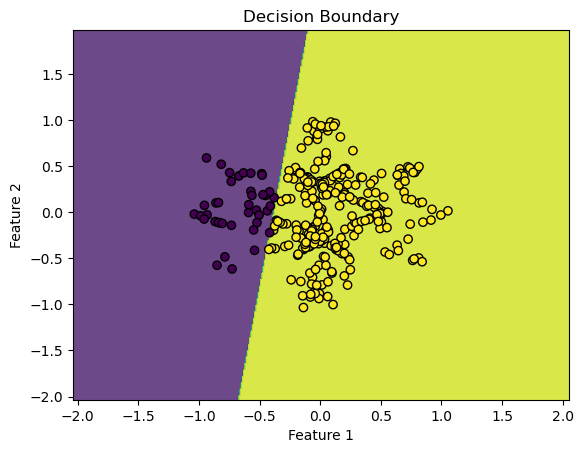

Forest Accuracy: 0.573


In [21]:
#Using logistic regression 
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
fit_model = lr_model.fit(X_train,y_train)
y_prediction = lr_model.predict(X_test)
plot_decision_boundary(lr_model,X_test,y_prediction)

score = accuracy_score(y_test, y_prediction)
print(f"Forest Accuracy: {score:.3f}")

Forecast accuracy:0.876


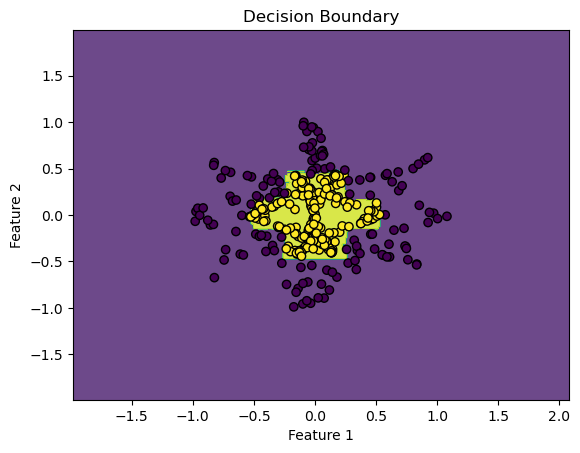

In [5]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


rf_model = RandomForestClassifier(max_depth=10,min_samples_split=10,min_samples_leaf=2)
rf_model.fit(X_train,y_train)
y_prediction = rf_model.predict(X_test)
score = accuracy_score(y_test,y_prediction)
print(f"Forecast accuracy:{score:.3f}")

plot_decision_boundary(rf_model,X_test,y_prediction)
